In [59]:
import glob
import os,sys
notebooks_dir = os.getcwd()
import numpy as np

project_dir = os.path.dirname(notebooks_dir)
code_dir = os.path.join(project_dir, 'code')  
if code_dir not in sys.path:
    sys.path.insert(0, code_dir)

from visualisation_utils import count_white_pixels

In [2]:
path_all_samples = r"C:\Users\aapolina\CODE\diffusion_segmentation\DATA\all"
path_used_samples = r"C:\Users\aapolina\CODE\diffusion_segmentation\DATA\size_specific_data"
path_test_samples = r"C:\Users\aapolina\CODE\diffusion_segmentation\DATA\iou_test"


In [3]:
import os

filenames_all_samples = os.listdir(os.path.join(path_all_samples, 'gt'))

gt_files = glob.glob(os.path.join(path_used_samples, '**/gt/*'), recursive=True)
filenames_used_samples = [os.path.basename(file) for file in gt_files]

In [10]:
#total_image_pixels = 512 * 512
size = [6.0, 25, 80]
eps = [3.018, 0.905, 19.262]


TypeError: can't multiply sequence by non-int of type 'float'

In [5]:
os.listdir(os.path.join(path_all_samples, 'gt'))[:3]

['0001.png', '0002.png', '0003.png']

In [73]:
import shutil
def copy_file(filename, source_path, destination_path):
            source_path = os.path.join(source_path, filename)
            destination_path = os.path.join(destination_path, filename)
            shutil.copyfile(source_path, destination_path)

In [77]:
white_pixels = []
sorted_filenames = []
for i, filename in enumerate(os.listdir(os.path.join(path_all_samples, 'gt'))):
    if i%1000==0: print(f"{i} files read")

    file_path = os.path.join(path_all_samples, 'gt', filename)
    x = count_white_pixels(file_path, relative=True)*100
    white_pixels.append(x)
    sorted_filenames.append([filename[:-4], x])


0 files read
1000 files read
2000 files read
3000 files read
4000 files read
5000 files read
6000 files read
7000 files read
8000 files read
9000 files read
10000 files read
11000 files read
12000 files read
13000 files read
14000 files read
15000 files read
16000 files read
17000 files read
18000 files read
19000 files read
20000 files read
21000 files read


In [78]:

sorted_filenames_unused = [[f,x] for f,x in sorted_filenames if f not in filenames_used_samples] #discard used samples


In [79]:
fx = sorted_filenames_unused

small = []
medium =[]
large = []


fx.sort(key=lambda x: abs(x[1]-size[0]))
small= fx[:100]
x = [x for _,x in small]
print(f"small test set: {min(x):.2f} / {np.mean(x):.2f} / {max(x):.2f}")

fx.sort(key=lambda x: abs(x[1]-size[1]))
medium = fx[:100]

x = [x for _,x in medium]
print(f"medium test set: {min(x):.2f} / {np.mean(x):.2f} / {max(x):.2f}")

fx.sort(key=lambda x: abs(x[1]-size[2]))
large= fx[:100]
x = [x for _,x in large]
print(f"large test set: {min(x):.2f} / {np.mean(x):.2f} / {max(x):.2f}")


small test set: 5.67 / 6.00 / 6.33
medium test set: 24.91 / 25.00 / 25.09
large test set: 75.77 / 78.88 / 84.11


In [80]:
os.path.exists(os.path.join(path_all_samples, 'gt'))
"q34545.jpg"[:-3]+'png'

'q34545.png'

In [81]:
for filename,_ in small:
    copy_file(filename+'.png', os.path.join(path_all_samples, 'gt'), os.path.join(path_test_samples, 'small', 'gt'))
    copy_file(filename+'.jpg', os.path.join(path_all_samples, 'img'), os.path.join(path_test_samples, 'small', 'img'))

for filename,_ in medium:
    copy_file(filename+'.png', os.path.join(path_all_samples, 'gt'), os.path.join(path_test_samples, 'medium', 'gt'))
    copy_file(filename+'.jpg', os.path.join(path_all_samples, 'img'), os.path.join(path_test_samples, 'medium', 'img'))

for filename,_ in large:
    copy_file(filename+'.png', os.path.join(path_all_samples, 'gt'), os.path.join(path_test_samples, 'large', 'gt'))
    copy_file(filename+'.jpg', os.path.join(path_all_samples, 'img'), os.path.join(path_test_samples, 'large', 'img'))


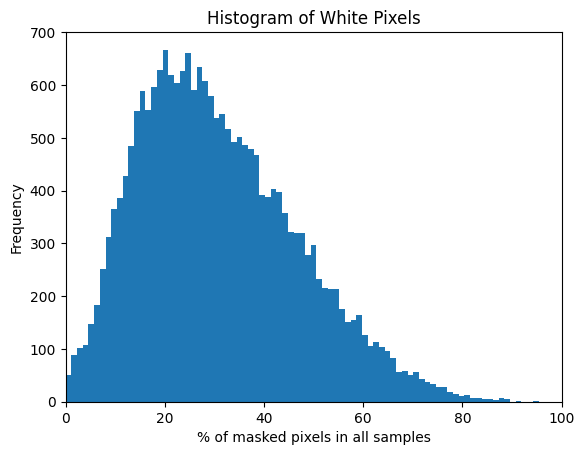

In [23]:

import matplotlib.pyplot as plt

plt.hist(white_pixels, bins=100)
plt.xlabel('% of masked pixels in all samples')
plt.ylabel('Frequency')
plt.title('Histogram of White Pixels')
plt.xlim(0, 100)
plt.show()


In [31]:
len(os.listdir(os.path.join(path_all_samples, 'gt')))

21553

In [24]:
count = len([x for x in white_pixels if x > size[2]-eps[2]])
count


1001

In [26]:
count = len([x for x in white_pixels if x > size[0]-eps[0] and x < size[0]+eps[0]])
count

1000

In [28]:
count = len([x for x in white_pixels if x > size[1]-eps[1] and x < size[1]+eps[1]])
count

1000

In [14]:
import cv2
import numpy as np
from PIL import Image
import PIL

i_small = 0
i_medium = 0
i_large = 0
n = 10

for i, filename in enumerate(os.listdir(os.path.join(path_all_samples, 'gt'))):
    if filename in filenames_used_samples: continue

    if i%100==0: print(f"{i} files read")

    file_path = os.path.join(path_all_samples, 'gt', filename)
    x = count_white_pixels(file_path, relative=True)*100

    if i_small<n and x >= size[0]-eps[0] and x <= size[0]+eps[0]:
        # small image
        copy_file(filename, os.path.join(path_all_samples, 'gt'), os.path.join(path_test_samples, 'small', 'gt'))
        copy_file(filename, os.path.join(path_all_samples, 'img'), os.path.join(path_test_samples, 'small', 'img'))
        i_small += 1

    elif i_small<n and x >= size[1]-eps[1] and x <= size[1]+eps[1]:
        # medium image
        copy_file(filename, os.path.join(path_all_samples, 'gt'), os.path.join(path_test_samples, 'medium', 'gt'))
        copy_file(filename, os.path.join(path_all_samples, 'img'), os.path.join(path_test_samples, 'medium', 'img'))
        i_medium += 1

    elif i_small<n and x >= size[2]-eps[2] and x <= size[2]+eps[2]:
        # large image
        copy_file(filename, os.path.join(path_all_samples, 'gt'), os.path.join(path_test_samples, 'large', 'gt'))
        copy_file(filename, os.path.join(path_all_samples, 'img'), os.path.join(path_test_samples, 'large', 'img'))
        i_large += 1
    else:
        # not in range
        pass



0 files read
100 files read
200 files read
300 files read
400 files read
700 files read
900 files read
1000 files read
1200 files read
1300 files read
1400 files read
1500 files read
1600 files read
1700 files read
1800 files read
1900 files read
2000 files read
2100 files read
2200 files read
2300 files read
2400 files read
2600 files read
2700 files read
2800 files read
2900 files read
3000 files read
3100 files read
3200 files read
3300 files read
3400 files read
3500 files read
3600 files read
3700 files read
3800 files read
3900 files read
4000 files read
4100 files read
4200 files read
4300 files read
4400 files read
4500 files read
4600 files read
4700 files read
4800 files read
5000 files read
5100 files read
5300 files read
5400 files read
5600 files read
5800 files read
5900 files read
6000 files read
6100 files read
6200 files read
6300 files read
6400 files read
6500 files read
6600 files read
6700 files read
6800 files read
6900 files read
7000 files read
7100 files read
7

In [16]:
i_small,i_medium,i_large

(0, 0, 0)